## Griddata

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.griddata.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


def func(x, y):
    """Target function"""
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


# randomly sample N Points
N = 1000

points = np.random.rand(N, 2)
values = func(points[:,0], points[:,1])



# Evaluate the 2d-spline interpolation on a regular grid
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
%time grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic', fill_value=0)



plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
gcf = plt.gcf()
gcf.set_size_inches(10, 10)
plt.show()



CPU times: user 40 ms, sys: 20 ms, total: 60 ms
Wall time: 116 ms


In [2]:
# could be made faster (https://stackoverflow.com/a/11146645/333403) but anyway ...
import itertools as it
xy = np.array(list(it.product(grid_x[:,0], grid_y.T[:,0])))

In [3]:
from sklearn.neural_network import MLPRegressor

## MLP KNN 2D

CPU times: user 43.5 s, sys: 408 ms, total: 43.9 s
Wall time: 12 s
CPU times: user 312 ms, sys: 8 ms, total: 320 ms
Wall time: 80.7 ms
CPU times: user 148 ms, sys: 12 ms, total: 160 ms
Wall time: 40 ms
CPU times: user 488 ms, sys: 20 ms, total: 508 ms
Wall time: 136 ms


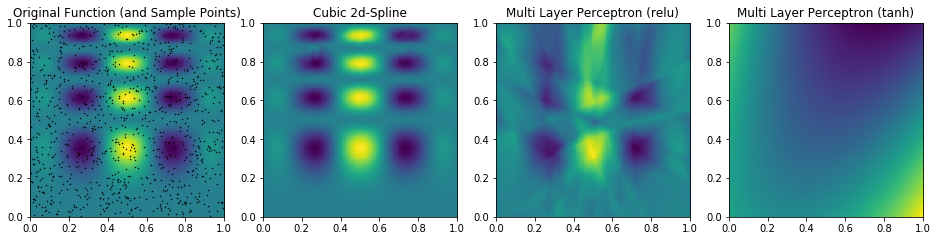

In [4]:
kwargs = dict(hidden_layer_sizes=[100, 100, 100], solver='lbfgs', max_iter=20000, validation_fraction=0.2)

nn1 = MLPRegressor(activation="relu", **kwargs)
nn2 = MLPRegressor(activation="tanh", **kwargs)

%time nn1.fit(points, values)
%time nn2.fit(points, values)

%time res_knn1 = nn1.predict(xy).reshape(*grid_x.shape)
%time res_knn2 = nn2.predict(xy).reshape(*grid_x.shape)

plt.figure(figsize=(16, 5))


plt.subplot(141)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title("Original Function (and Sample Points)")

plt.subplot(142)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic 2d-Spline')

plt.subplot(143)
plt.imshow(res_knn1.T, extent=(0,1,0,1), origin='lower')
plt.title("Multi Layer Perceptron (relu)")

plt.subplot(144)
plt.imshow(res_knn2.T, extent=(0,1,0,1), origin='lower')
plt.title("Multi Layer Perceptron (tanh)")

plt.show()